<a href="https://colab.research.google.com/github/mrtfzh/TugasSisCerdas_TutorialTensorFlowdanKeras_2101046_MaritaFauziah/blob/main/Tugas_SisCerdas_TutorialTensorFlowdanKeras_2101201046_Marita_Fauziah_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tahap Pertama, Melakukan instalasi serta mengimport model dan library yang akan digunakan pada simulasi untuk memprediksi fungsi cosinus dari suatu bilangan

In [25]:
#Melakukan instalasi os dan juga mendeklarasikan jalur pada model files 
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'
#Melakukan instalasi library tensor flow
! pip install tensorflow==2.4.0rc0
import tensorflow as tf #melakukan pengimportan library tensorflow dimana library tersebut berkaitan dengan deep learning atau digunakan untuk deep learning, library ini dikembangkan oleh Google Brain Team
from tensorflow import keras #melakukan pengimportan libary keras yang terdapat pada tensorflow, libarary keras sendiri kurang lebih fungsi yang sama yaitu untuk deep learning dan dikembangkan oleh Francois Chollet
import numpy as np  #melakukan pengimportan library Numpy adalah library phyton yang fokus kepada scientific computing, biasanya digunakan untuk membuat objek N-dimensional array
import pandas as pd # melakukan pengimportan library Pandas adalah library phyton yang berfokus pada analisa data yang memiliki struktur data yang diperlukan untuk membersihkan data mentah 
#ke dalam sebuah bentuk yang cocok untuk dianalisis. Data disini berasal dari dataset yang sudah diimport sebelumnya
import matplotlib.pyplot as plt  #melakukan pengimportan library matplotlib adalah library yang memiliki fungsi sama dengan Seaborn, namun seaborn memiliki beberapa kelebihan dibandingkan matplotlib
import math #melakukan pengimportan library math
seed = 1
np.random.seed(seed)


Tahap Kedua, Melakukan pembuatan angka dengan jumlah data titik sample yang digunakan 2000 kemudian melakukan pemrosesan fungsi cosinus pada bilangan tersebut dan melakukan ploting bentuk grafik

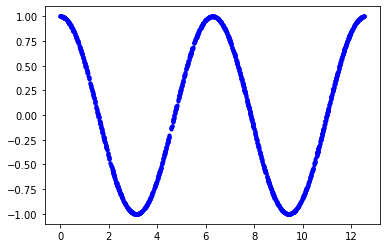

In [4]:
seed = 1
np.random.seed(seed) #digunakan untuk membuat angka secara acak yang dapat diprekdisi
SAMPLES = 2000 #mendeklarasikan jumlah titk data sample yang digunakan, pada percobaan ini digunakan 2000 sample 
x_values = np.random.uniform(low=0, high=4*math.pi, size=SAMPLES).astype(np.float32) #mengenerata gelombang cosinus yang diinginkan dengan batas 0 hingga 4 phi.
np.random.shuffle(x_values) #melakukan proses shuffle yang digunakan untuk memastikan data tidak berurutan 
y_values = np.cos(x_values).astype(np.float32) #melakukan perhitungan untuk fungsi cosinus
plt.plot(x_values, y_values, 'b.') #melakukan ploting dalam bentuk grafik dari hasil kalkulasi fungsi cosinus sebelumnya
plt.show() # menampilkan ploting grafik yang sudah dibuat sebelumnya


Melakukan penambahan bilangan random pada fungsi y untuk menghasilkan data fungsi cosinus menjadi random (kotor) sehingga dengan menggunakan code deep learning disimulasikan untuk melakukan prediksi dari bentuk bersih dari data cosinus tersebut dan melakukan ploting untuk hasil penambahan bilangan tersebut



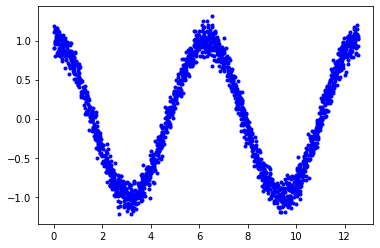

In [5]:
y_values += 0.1 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
plt.show()


Code dibawah menjelaskan proses pembagian data set menjadi tiga bagian yaitu data train, data test dan data validasi. Perbandingan yang dilakukan adalah 0.5:0.3:0.2 dimana data test yang digunakan 30% sedangkan data train 50% dan data validasi sebesar : 20%. 
Catatan : Data train adalah Data yang digunakan untuk melatih algoritma Data testing adalah Data yang dipakai untuk mengetahui performa algoritma yang sudah dilatih sebelumnya ketika menemukan data baru yang belum pernah dilihat sebelumnya.Setelah data dibuat menjadi lebih kecil, kemudian dilanjutkan dengan proses pelatihan dari data training. Pelatihan dari data training dapat disebut juga model.

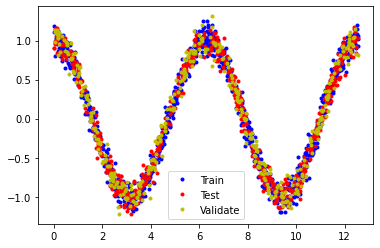

In [7]:
#mendeklarasikan pembagian jumlah dari setiap bagian data yang akan digunakan yaitu data train, data test dan data validasi
TRAIN_SPLIT =  int(0.5 * SAMPLES)
TEST_SPLIT = int(0.3 * SAMPLES + TRAIN_SPLIT)

#digunakan untuk membagi dataset menjadi 3 bagian yang sudah dideklerasikan sebelumnya jumlahnya
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
#digunakan untuk memeriksa kesesuaian data yang sudah dibagi 
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES
#melakukan plotingan terhadap 3 data sebelumnya dengan warna yang berbeda untuk representasikan data tersebut
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


SKENARIO SATU
Melakukan pemodelan Keras untuk deep learning serta men-traingin data yang sudah dibagi sebelumnya. 
Pada code dibawah dapat dilihat model yang digunakan adalah pemodelan sequential. Dalam codingan dibawah ini jumlah hidden layer ada 1 ,dimana untuk menambahkan hidden layer menggunakan Dense, (10,,activation='relu'input_shape (1)) sedangkan untuk didalamnya dapat dijelaskan bahwa 10 adalah neuron pada hidden layer 1, kemudian 1 adalah neuron pada bagian input sedangkan relu adalah salah satu fungsi aktivasi.Jumlah layer dan jumlah neuron dapat disesuaikan. Kemudian melakukan konfigurasi pelatihan seperti tertera dibawah. Kemudian traning data dilakukan.

Epoch adalah kondisi ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran, karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches).Vall_loss adalah nilai fungsi biaya untuk data validasi silang Anda dan kerugian adalah nilai fungsi biaya untuk data pelatihan Anda. Pada data validasi, neuron yang menggunakan drop out tidak menjatuhkan neuron acak. Alasannya adalah selama pelatihan kami menggunakan drop out untuk menambah kebisingan untuk menghindari pemasangan yang berlebihan.

optimizer adam digunakan dalam tugas klasifikasi

In [8]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(10, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=400, batch_size=64, validation_data=(x_validate, y_validate))


Epoch 1/400
16/16 [==============================] - 1s 27ms/step - loss: 5.8713 - mae: 2.1074 - val_loss: 3.4927 - val_mae: 1.6191
Epoch 2/400
16/16 [==============================] - 0s 4ms/step - loss: 3.1445 - mae: 1.5126 - val_loss: 1.6599 - val_mae: 1.0822
Epoch 3/400
16/16 [==============================] - 0s 4ms/step - loss: 1.3629 - mae: 0.9707 - val_loss: 0.8527 - val_mae: 0.7751
Epoch 4/400
16/16 [==============================] - 0s 4ms/step - loss: 0.7516 - mae: 0.7258 - val_loss: 0.5828 - val_mae: 0.6639
Epoch 5/400
16/16 [==============================] - 0s 5ms/step - loss: 0.5425 - mae: 0.6434 - val_loss: 0.5264 - val_mae: 0.6405
Epoch 6/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5371 - mae: 0.6495 - val_loss: 0.5164 - val_mae: 0.6353
Epoch 7/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5391 - mae: 0.6543 - val_loss: 0.5164 - val_mae: 0.6354
Epoch 8/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5227 - 

Menampilkan grafik error dari hasil training

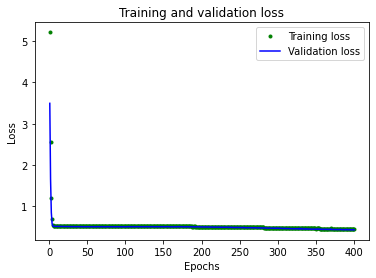

In [11]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



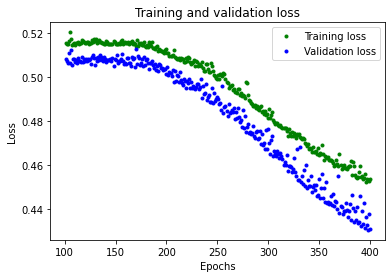

In [12]:
SKIP = 100
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


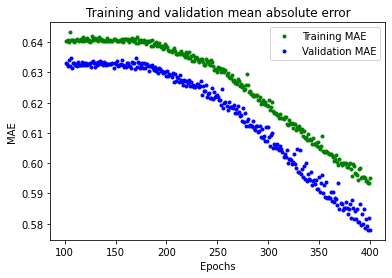

In [14]:
plt.clf()
train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


Melakukan kalkulasi jumlah kesalahan pada hasil prediksi dan melihat bentuk grafik dari sisi Mean Absolute error
Hasi perbandingan menggunakan deep learning pada skenario satu

19/19 [==============================] - 0s 1ms/step - loss: 0.4448 - mae: 0.5960


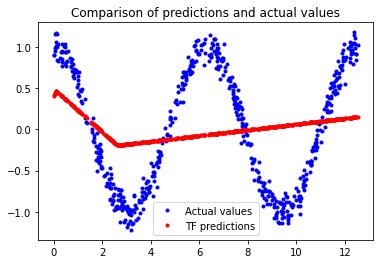

In [16]:
test_loss, test_mae = model.evaluate(x_test, y_test)
y_test_pred = model.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()


SKENARIO DUA

> Indented block



SKENARIO DUA 
Melakukan pemodelan Keras untuk deep learning serta men-traingin data yang sudah dibagi sebelumnya. Pada code dibawah dapat dilihat model yang digunakan adalah pemodelan sequential. 
Dalam codingan dibawah ini jumlah hidden layer ada 5 ,dimana untuk menambahkan hidden layer menggunakan Dense, (10,,activation='relu'input_shape (1)) sedangkan untuk didalamnya dapat dijelaskan bahwa 8,16,24,32, dan 40 adalah neuron pada hidden layer 1,2,3,4,5 secara berurutan, kemudian 1 adalah neuron pada bagian input sedangkan relu adalah salah satu fungsi aktivasi.Jumlah layer dan jumlah neuron dapat disesuaikan. Kemudian melakukan konfigurasi pelatihan seperti tertera dibawah. Kemudian traning data dilakukan.

Epoch adalah kondisi ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran, karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches).Vall_loss adalah nilai fungsi biaya untuk data validasi silang Anda dan kerugian adalah nilai fungsi biaya untuk data pelatihan Anda. Pada data validasi, neuron yang menggunakan drop out tidak menjatuhkan neuron acak. Alasannya adalah selama pelatihan kami menggunakan drop out untuk menambah kebisingan untuk menghindari pemasangan yang berlebihan.

optimizer adam digunakan dalam tugas klasifikasi

In [ ]:
model_1 = tf.keras.Sequential()
model_1.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))
model_1.add(keras.layers.Dense(16, activation='relu'))
model_1.add(keras.layers.Dense(24, activation='relu'))
model_1.add(keras.layers.Dense(32, activation='relu'))
model_1.add(keras.layers.Dense(1))
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_1 = model_1.fit(x_train, y_train, epochs=400, batch_size=64,validation_data=(x_validate, y_validate))
model_1.save(MODEL_TF)


Epoch 1/400
8/8 [==============================] - 1s 28ms/step - loss: 1.4056 - mae: 0.9613 - val_loss: 0.6552 - val_mae: 0.6808
Epoch 2/400
8/8 [==============================] - 0s 8ms/step - loss: 0.6075 - mae: 0.6728 - val_loss: 0.5238 - val_mae: 0.6533
Epoch 3/400
8/8 [==============================] - 0s 8ms/step - loss: 0.5445 - mae: 0.6529 - val_loss: 0.5682 - val_mae: 0.6671
Epoch 4/400
8/8 [==============================] - 0s 7ms/step - loss: 0.5577 - mae: 0.6567 - val_loss: 0.5390 - val_mae: 0.6582
Epoch 5/400
8/8 [==============================] - 0s 8ms/step - loss: 0.5049 - mae: 0.6310 - val_loss: 0.5156 - val_mae: 0.6483
Epoch 6/400
8/8 [==============================] - 0s 8ms/step - loss: 0.5068 - mae: 0.6362 - val_loss: 0.5146 - val_mae: 0.6471
Epoch 7/400
8/8 [==============================] - 0s 9ms/step - loss: 0.5119 - mae: 0.6428 - val_loss: 0.5106 - val_mae: 0.6447
Epoch 8/400
8/8 [==============================] - 0s 9ms/step - loss: 0.5142 - mae: 0.6449 - va

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets


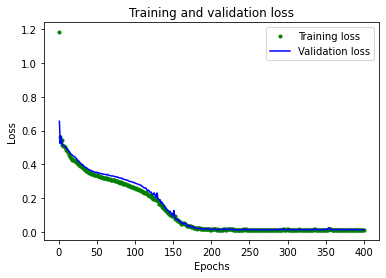

In [ ]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


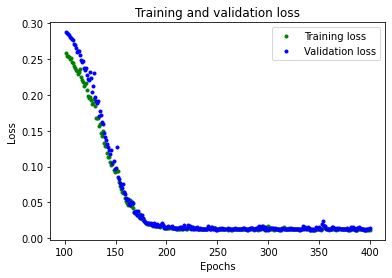

In [ ]:
SKIP = 100
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

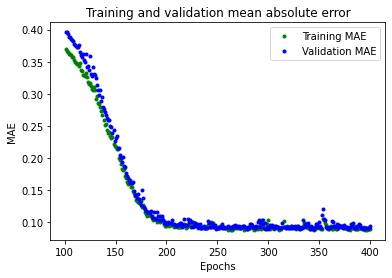

In [ ]:
plt.clf()
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

Hasi perbandingan menggunakan deep learning pada skenario dua

10/10 [==============================] - 0s 2ms/step - loss: 0.0112 - mae: 0.0860


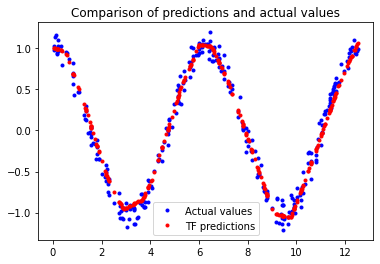

In [ ]:
test_loss, test_mae = model_1.evaluate(x_test, y_test)
y_test_pred = model_1.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()


SKENARIO TIGA
 
Melakukan pemodelan Keras untuk deep learning serta men-traingin data yang sudah dibagi sebelumnya. Pada code dibawah dapat dilihat model yang digunakan adalah pemodelan sequential. 
Dalam codingan dibawah ini jumlah hidden layer ada 5 ,dimana untuk menambahkan hidden layer menggunakan Dense, (10,,activation='relu'input_shape (1)) sedangkan untuk didalamnya dapat dijelaskan bahwa 8,16,24,32, dan 40 adalah neuron pada hidden layer 1,2,3,4,5 secara berurutan, kemudian 1 adalah neuron pada bagian input sedangkan relu adalah salah satu fungsi aktivasi.Jumlah layer dan jumlah neuron dapat disesuaikan. Kemudian melakukan konfigurasi pelatihan seperti tertera dibawah. Kemudian traning data dilakukan.

Epoch adalah kondisi ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran, karena satu Epoch terlalu besar untuk dimasukkan (feeding) kedalam komputer maka dari itu kita perlu membaginya kedalam satuan kecil (batches).Vall_loss adalah nilai fungsi biaya untuk data validasi silang Anda dan kerugian adalah nilai fungsi biaya untuk data pelatihan Anda. Pada data validasi, neuron yang menggunakan drop out tidak menjatuhkan neuron acak. Alasannya adalah selama pelatihan kami menggunakan drop out untuk menambah kebisingan untuk menghindari pemasangan yang berlebihan.

optimizer sgd digunakan dalam tugas klasifikasi

In [21]:
model_2 = tf.keras.Sequential()
model_2.add(keras.layers.Dense(8, activation='relu', input_shape=(1,)))
model_2.add(keras.layers.Dense(16, activation='relu'))
model_2.add(keras.layers.Dense(24, activation='relu'))
model_2.add(keras.layers.Dense(32, activation='relu'))
model_2.add(keras.layers.Dense(40, activation='relu'))
model_2.add(keras.layers.Dense(1))
model_2.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history_2 = model_2.fit(x_train, y_train, epochs=400, batch_size=64,validation_data=(x_validate, y_validate))
model_2.save(MODEL_TF)

Epoch 1/400
16/16 [==============================] - 1s 14ms/step - loss: 0.5263 - mae: 0.6426 - val_loss: 0.5280 - val_mae: 0.6417
Epoch 2/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5243 - mae: 0.6444 - val_loss: 0.5076 - val_mae: 0.6325
Epoch 3/400
16/16 [==============================] - 0s 4ms/step - loss: 0.4943 - mae: 0.6230 - val_loss: 0.5088 - val_mae: 0.6330
Epoch 4/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5043 - mae: 0.6297 - val_loss: 0.5025 - val_mae: 0.6298
Epoch 5/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5045 - mae: 0.6275 - val_loss: 0.5074 - val_mae: 0.6323
Epoch 6/400
16/16 [==============================] - 0s 5ms/step - loss: 0.5101 - mae: 0.6364 - val_loss: 0.5099 - val_mae: 0.6333
Epoch 7/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5274 - mae: 0.6479 - val_loss: 0.5089 - val_mae: 0.6328
Epoch 8/400
16/16 [==============================] - 0s 4ms/step - loss: 0.5056 - 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model/assets


Melakukan proses yang sama seperti pada skenario satu dan dua

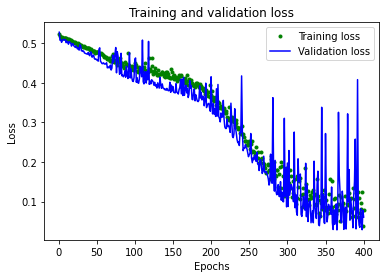

In [22]:
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

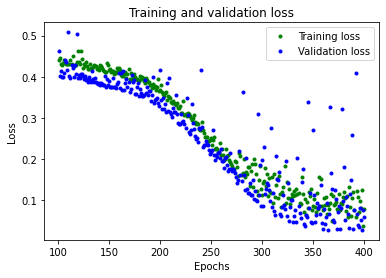

In [26]:
SKIP = 100
plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

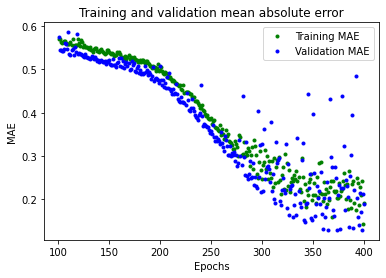

In [23]:
plt.clf()
train_mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

19/19 [==============================] - 0s 2ms/step - loss: 0.0614 - mae: 0.1886


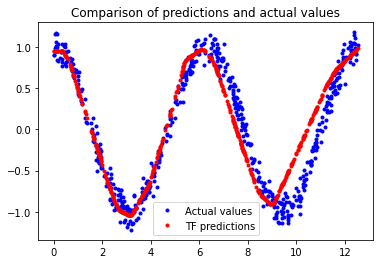

In [24]:
test_loss, test_mae = model_2.evaluate(x_test, y_test)
y_test_pred = model_2.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predictions')
plt.legend()
plt.show()
